In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
prenoms = pd.read_csv("drive/My Drive/datasets/dpt2018.csv",sep=";")

In [ ]:
prenoms

Q1: Combien de gens sont nées en XXXX ?
Q2: Quel est le nom le plus donné dans le département XX entre l'année XXXX et XXXX ?
Q3: Augmentation du nombre de prénoms différents entre deux périodes données.

In [ ]:
Q1 = prenoms[prenoms["annais"] == "2016"]
Q1 = Q1[Q1["nombre"] > 300].count()[0]
print(Q1)

In [ ]:
prenoms.dtypes

In [ ]:
prenoms.plot()

In [ ]:
total_naissances=prenoms.pivot_table('nombre',index=prenoms[(prenoms.annais !='XXXX')].annais,columns='sexe',aggfunc=sum)
total_naissances

In [ ]:
annais = prenoms[(prenoms.annais != "XXXX")]
annais

In [ ]:
annais.axes[0].array


In [ ]:
plt.rcParams['figure.figsize'] = [15, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce

In [ ]:
total_naissances.plot(title="total naissances par genre et par an *")

In [ ]:
top20=prenoms.groupby("preusuel").nombre.sum().sort_values()[-10:]
import seaborn as sns
sns.barplot(y=top20.index, x=top20.values).set_title("Volume des 20 prénoms les plus donnés entre 1900 et 2018")

In [ ]:
#https://www.insee.fr/fr/statistiques/fichier/3720946/departement2019-csv.zip
#https://www.insee.fr/fr/information/3720946

dep=pd.read_csv("drive/My Drive/datasets/departement2019.csv",sep=",")
dep


In [ ]:
# Nombre de valeurs distinctes dans une colonne
prenoms['dpt'].nunique()
depdict=dict(zip(dep.dep,dep.libelle))
depdict
prenoms['dpt'].replace(depdict)


In [ ]:
#https://www.insee.fr/fr/statistiques/fichier/2540004/nat2018_csv.zip
#https://www.insee.fr/fr/statistiques/2540004
prenoms['nomdep']=prenoms['dpt'].replace(depdict)
prenoms['genre']=prenoms['sexe'].map(lambda x: "H" if x==1 else "F")


In [ ]:
def add_prop(group):
    group['prop'] = group.nombre / group.nombre.sum()
    return group

nat=nat.groupby(['annais','sexe']).apply(add_prop)
nat.sort_values(by="prop")


In [ ]:
# SANITY CHECK 1
# Let's verify that sum of proportions inside a group year/sex equals 1.0
nat.groupby(['annais','sexe']).prop.sum()


In [ ]:
# iloc permet d'accéder au contenu d'une cellule par rapport a ses coordonnées
yrMaxProp=nat.sort_values(by="prop")[-1:].annais.iloc[0]
yrMaxProp
birthsMaxProp=nat.sort_values(by="prop")[-1:].nombre.iloc[0]
birthsMaxProp


In [ ]:
maxprop=nat.sort_values(by="prop")[-1:].prop.iloc[0]
maxprop


In [ ]:
sumsYrMaxProp=nat[nat.annais==yrMaxProp].groupby(["sexe"]).nombre.sum()
sumsYrMaxProp


In [ ]:
sumYrMaxProp=nat[nat.annais==yrMaxProp].groupby(["sexe"]).nombre.sum()
sumYrMaxProp
SumYrMaxProp=nat[nat.annais==yrMaxProp].groupby(["annais", "sexe"]).nombre.sum().iloc[sexeMaxProp-1]
SumYrMaxProp


In [ ]:
if birthsMaxProp / SumYrMaxProp == maxprop :
    print ("Sanity Check 2 .... PASSED")
sexeMaxProp=nat.sort_values(by="prop")[-1:].sexe.iloc[0]
sexeMaxProp
def get_top5(df,column="nombre"):
    return df.sort_values(by=column)[-5:]

In [ ]:
get_top5(nat)
nat.groupby(['annais','sexe']).apply(get_top5)

# Meteo Dataset

https://www.data.gouv.fr/fr/datasets/42-station-meteo-toulouse-parc-compans-cafarelli/#_

**data**: data[text] message brut en provenance de la station météo

**id**: id[int] Identifiant de la station la station n°1 est celle de la météopole
humidite: humidite[int] Valeur d’humidité en pourcentage

**direction_du_vecteur_de_vent_max**: direction_du_vecteur_de_vent_max[int] Cette valeur représente la direction de la rafale maximum sur les 15 minutes précédentes. Allant de 0 à 15, donne une indication sur l’angle en degré par rapport au nord (sens horaire).
0 ==> 0°
1==> 22.5°
2==> 45 °
.
.
.
15 == > 337.5°
Cette valeur n’est pas moyennée.

**pluie_intensite_max**: pluie_intensite_max[double] Intensité maximale de pluie sur une minute.

**pression**: pression[int] valeur de pression. La valeur contenues dans ce champ doivent être additionnées à 900.

**direction_du_vecteur_vent_moyen**: direction_du_vecteur_vent_moyen[int] Angle entre la direction de laquelle vient vent par rapport à une référence cardinale qui est ici le nord

**type_de_station**: type_de_station[text] Il existe deux types de stations : Integrated Sensor Suite (ISS) regroupant uncapteur de : Température, Humidité, Anémomètre, Pluviomètre, Capteur de Pression

**pluie**: pluie[double] quantité de précipitation en mm.

**direction_du_vecteur_de_rafale_de_vent_max**: direction_du_vecteur_de_vent_max_en_degres[double] Angle entre la direction de laquelle vient vent par rapport a une référence cardinale qui est ici le nord

**force_moyenne_du_vecteur_vent**: force_moyenne_du_vecteur_vent[int] force du vecteur de vent (norme). En km/h

**force_rafale_max**: force_rafale_max[int] Vitesse maximale du vent dans les 15 dernières minutes

**temperature**: temperature_en_degre_c[double] Température moyenne des 15 dernières minutes

**heure_de_paris**: heure_de_paris[datetime] heure sur le fuseau horaire de Paris

**heure_utc**: heure_utc[text] Heure UTC


In [ ]:
meteo = pd.read_csv("drive/My Drive/datasets/meteo.csv",sep=";")

In [4]:
meteo = pd.read_csv("datasets/meteo.csv",sep=";")

In [5]:
meteo

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
0,54c91b4fdaa800002d000c00,42.0,85.0,0.0,0.0,100400.0,0.0,ISS,0.0,0.0,1.0,3.0,13.6,2020-06-10T00:15:00+02:00,2020-06-09T22:15:00+00:00
1,553209f2cdc800000ca00800,42.0,57.0,0.0,0.0,100100.0,0.0,ISS,0.0,0.0,0.0,2.0,25.3,2019-09-18T21:30:00+02:00,2019-09-18T19:30:00+00:00
2,553208f349a000002c801800,42.0,52.0,0.0,0.0,100000.0,0.0,ISS,0.0,0.0,1.0,6.0,27.2,2019-09-18T19:30:00+02:00,2019-09-18T17:30:00+00:00
3,553208738d9004500c940c00,42.0,50.0,10.0,0.0,100000.0,138.0,ISS,0.0,225.0,0.0,3.0,28.3,2019-09-18T18:30:00+02:00,2019-09-18T16:30:00+00:00
4,55320612c9d800002ca01400,42.0,59.0,0.0,0.0,100100.0,0.0,ISS,0.0,0.0,1.0,5.0,25.2,2019-09-18T13:45:00+02:00,2019-09-18T11:45:00+00:00
5,553205f2c1e000000ca01400,42.0,60.0,0.0,0.0,100100.0,0.0,ISS,0.0,0.0,0.0,5.0,25.0,2019-09-18T13:30:00+02:00,2019-09-18T11:30:00+00:00
6,55320572620800002ca00c00,42.0,65.0,0.0,0.0,100100.0,0.0,ISS,0.0,0.0,1.0,3.0,23.8,2019-09-18T12:30:00+02:00,2019-09-18T10:30:00+00:00
7,553204b20e2800000ca00800,42.0,69.0,0.0,0.0,100100.0,0.0,ISS,0.0,0.0,0.0,2.0,22.3,2019-09-18T11:00:00+02:00,2019-09-18T09:00:00+00:00
8,55320391ca3800000c800c00,42.0,71.0,0.0,0.0,100000.0,0.0,ISS,0.0,0.0,0.0,3.0,21.2,2019-09-18T08:45:00+02:00,2019-09-18T06:45:00+00:00
9,55320251da3800000c600800,42.0,71.0,0.0,0.0,99900.0,0.0,ISS,0.0,0.0,0.0,2.0,21.6,2019-09-18T06:15:00+02:00,2019-09-18T04:15:00+00:00


In [6]:
meteo.describe()

,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature
count,24581.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000
mean,41.849843,65.520952,2.518959,0.007128,100000.089504,8.792352,0.000586,56.676566,0.456103,3.511473,18.451664
std,2.477061,19.905203,4.359679,0.042016,1309.335171,30.200383,0.024532,98.092778,0.860449,4.193826,9.446069
min,0.000000,0.000000,0.000000,0.000000,90000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000
25%,42.000000,51.000000,0.000000,0.000000,99800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.400000
50%,42.000000,68.000000,0.000000,0.000000,100100.000000,0.000000,0.000000,0.000000,0.000000,3.000000,19.300000
75%,42.000000,82.000000,3.000000,0.000000,100500.000000,0.000000,0.000000,67.500000,1.000000,5.000000,24.000000
max,42.000000,97.000000,15.000000,2.200000,102000.000000,180.000000,2.000000,337.500000,6.000000,34.000000,40.800000


In [7]:
meteo_clean = meteo[meteo.temperature > -10].sort_values(by='heure_de_paris')

On peut voir dans le describe que des valeurs incohérente de -50°C existent dans les données, afin de pouvoir représenté une évolution de la température réaliste, je les retire.

In [8]:
year = [0 for u in range(len(meteo_clean))]
month = [0 for u in range(len(meteo_clean))]
day = [0 for u in range(len(meteo_clean))]
hour = [0 for u in range(len(meteo_clean))]
minute = [0 for u in range(len(meteo_clean))]
for i in range(len(meteo_clean)):
  year[i] = int(meteo_clean['heure_de_paris'].values[i][0:4])
  month[i] = int(meteo_clean['heure_de_paris'].values[i][5:7])
  day[i] = int(meteo_clean['heure_de_paris'].values[i][8:10])
  hour[i] = int(meteo_clean['heure_de_paris'].values[i][11:13])
  minute[i] = int(meteo_clean['heure_de_paris'].values[i][14:16])

In [9]:
meteo_clean['year'] = year
meteo_clean['month'] = month
meteo_clean['day'] = day
meteo_clean['hour'] = hour
meteo_clean['minute'] = minute

In [10]:
plt.rcParams['figure.figsize'] = [12, 5] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce

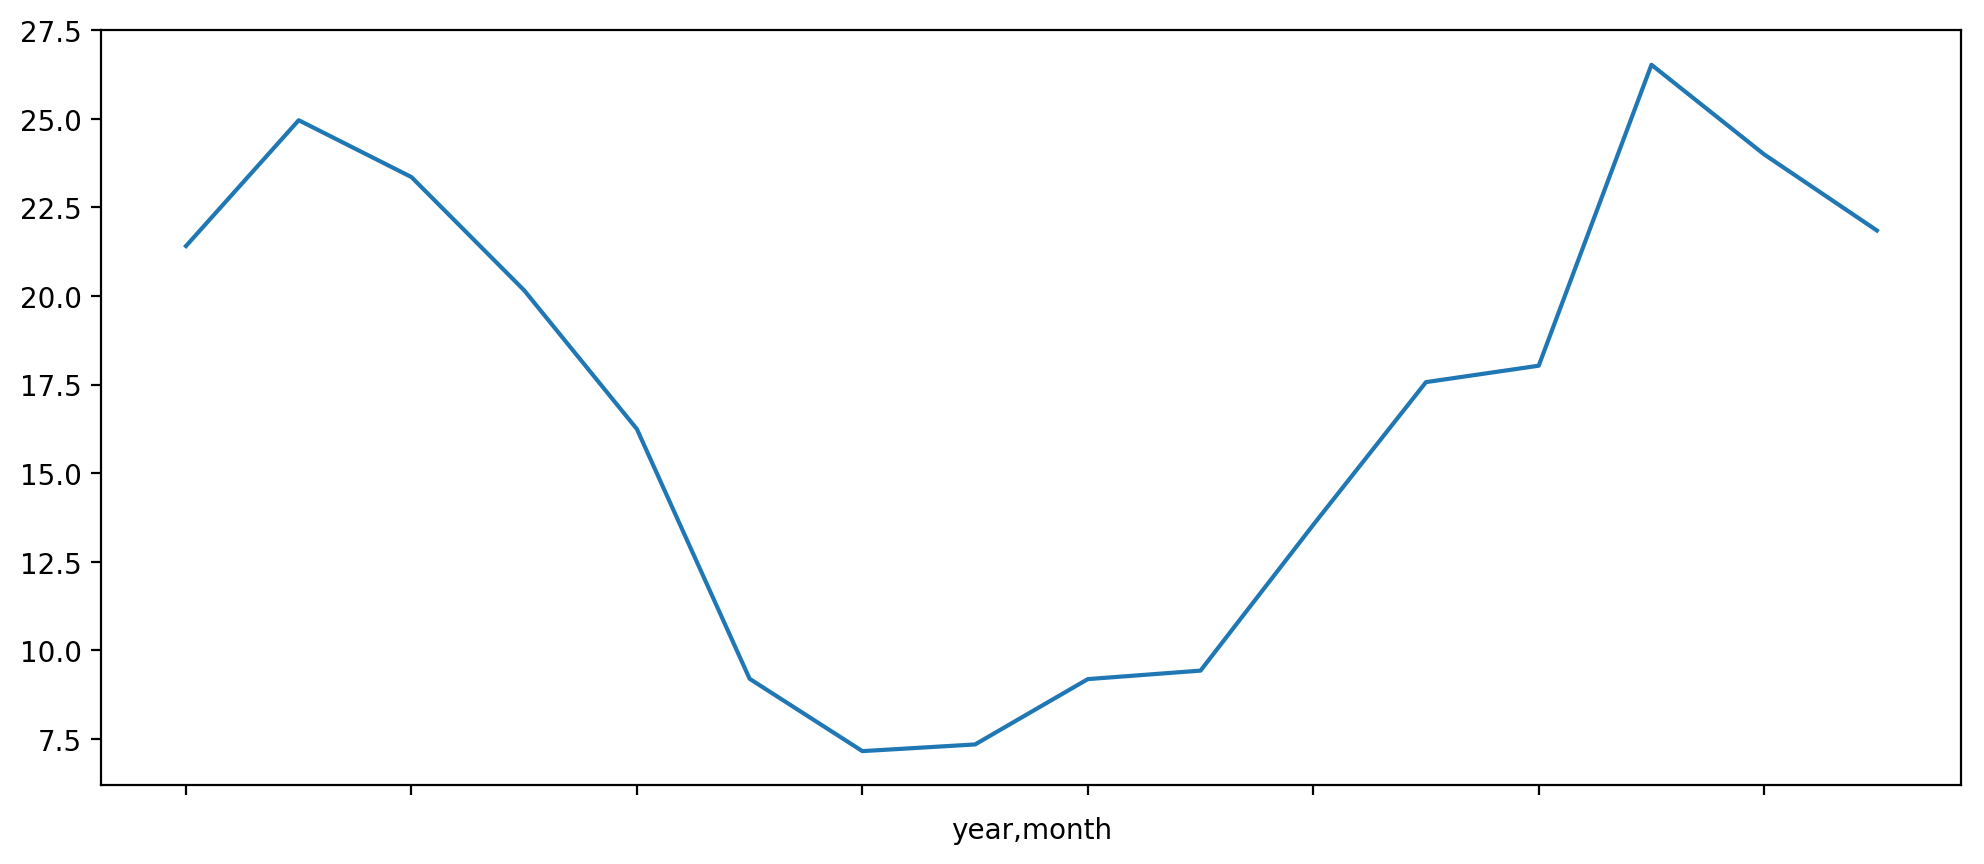

In [11]:
meteo_clean.groupby((["year","month"])).temperature.mean().plot()

In [12]:
meteo_clean

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc,year,month,day,hour,minute
7930,02c6038f9ac8000000000000,1.0,89.0,0.0,0.0,90000.0,0.0,ISS,0.0,0.0,0.0,0.0,12.6,2019-06-06T08:45:00+02:00,2019-06-06T06:45:00+00:00,2019,6,6,8,45
15817,02c603af9ac8000000000000,1.0,89.0,0.0,0.0,90000.0,0.0,ISS,0.0,0.0,0.0,0.0,12.6,2019-06-06T09:00:00+02:00,2019-06-06T07:00:00+00:00,2019,6,6,9,0
20204,02c603cfcab0043000001400,1.0,86.0,0.0,0.0,90000.0,134.0,ISS,0.0,0.0,0.0,5.0,13.2,2019-06-06T09:15:00+02:00,2019-06-06T07:15:00+00:00,2019,6,6,9,15
9828,02c603efc6a80490001c0800,1.0,85.0,14.0,0.0,90000.0,146.0,ISS,0.0,315.0,0.0,2.0,13.1,2019-06-06T09:30:00+02:00,2019-06-06T07:30:00+00:00,2019,6,6,9,30
2521,02c6040fcab00460001c0c00,1.0,86.0,14.0,0.0,90000.0,140.0,ISS,0.0,315.0,0.0,3.0,13.2,2019-06-06T09:45:00+02:00,2019-06-06T07:45:00+00:00,2019,6,6,9,45
7920,02c6042fd6a8051000000c00,1.0,85.0,0.0,0.0,90000.0,162.0,ISS,0.0,0.0,0.0,3.0,13.5,2019-06-06T10:00:00+02:00,2019-06-06T08:00:00+00:00,2019,6,6,10,0
15816,02c6044fe69803a0201e0c00,1.0,83.0,15.0,0.0,90000.0,116.0,ISS,0.0,337.5,1.0,3.0,13.9,2019-06-06T10:15:00+02:00,2019-06-06T08:15:00+00:00,2019,6,6,10,15
20203,02c6047006900000001a0c00,1.0,82.0,13.0,0.0,90000.0,0.0,ISS,0.0,292.5,0.0,3.0,14.1,2019-06-06T10:30:00+02:00,2019-06-06T08:30:00+00:00,2019,6,6,10,30
2520,02c604901680000020121800,1.0,80.0,9.0,0.0,90000.0,0.0,ISS,0.0,202.5,1.0,6.0,14.5,2019-06-06T10:45:00+02:00,2019-06-06T08:45:00+00:00,2019,6,6,10,45
20202,02c604b04a70040000160c00,1.0,78.0,11.0,0.0,90000.0,128.0,ISS,0.0,247.5,0.0,3.0,15.2,2019-06-06T11:00:00+02:00,2019-06-06T09:00:00+00:00,2019,6,6,11,0


Quelle est l'évolution de la température au cours du temps sur le jeu de donnée ?

In [13]:
temp = meteo_clean.pivot_table('temperature',index='heure_de_paris',aggfunc='mean')
temp

,temperature
heure_de_paris,
2019-06-06T08:45:00+02:00,12.6
2019-06-06T09:00:00+02:00,12.6
2019-06-06T09:15:00+02:00,13.2
2019-06-06T09:30:00+02:00,13.1
2019-06-06T09:45:00+02:00,13.2
2019-06-06T10:00:00+02:00,13.5
2019-06-06T10:15:00+02:00,13.9
2019-06-06T10:30:00+02:00,14.1
2019-06-06T10:45:00+02:00,14.5


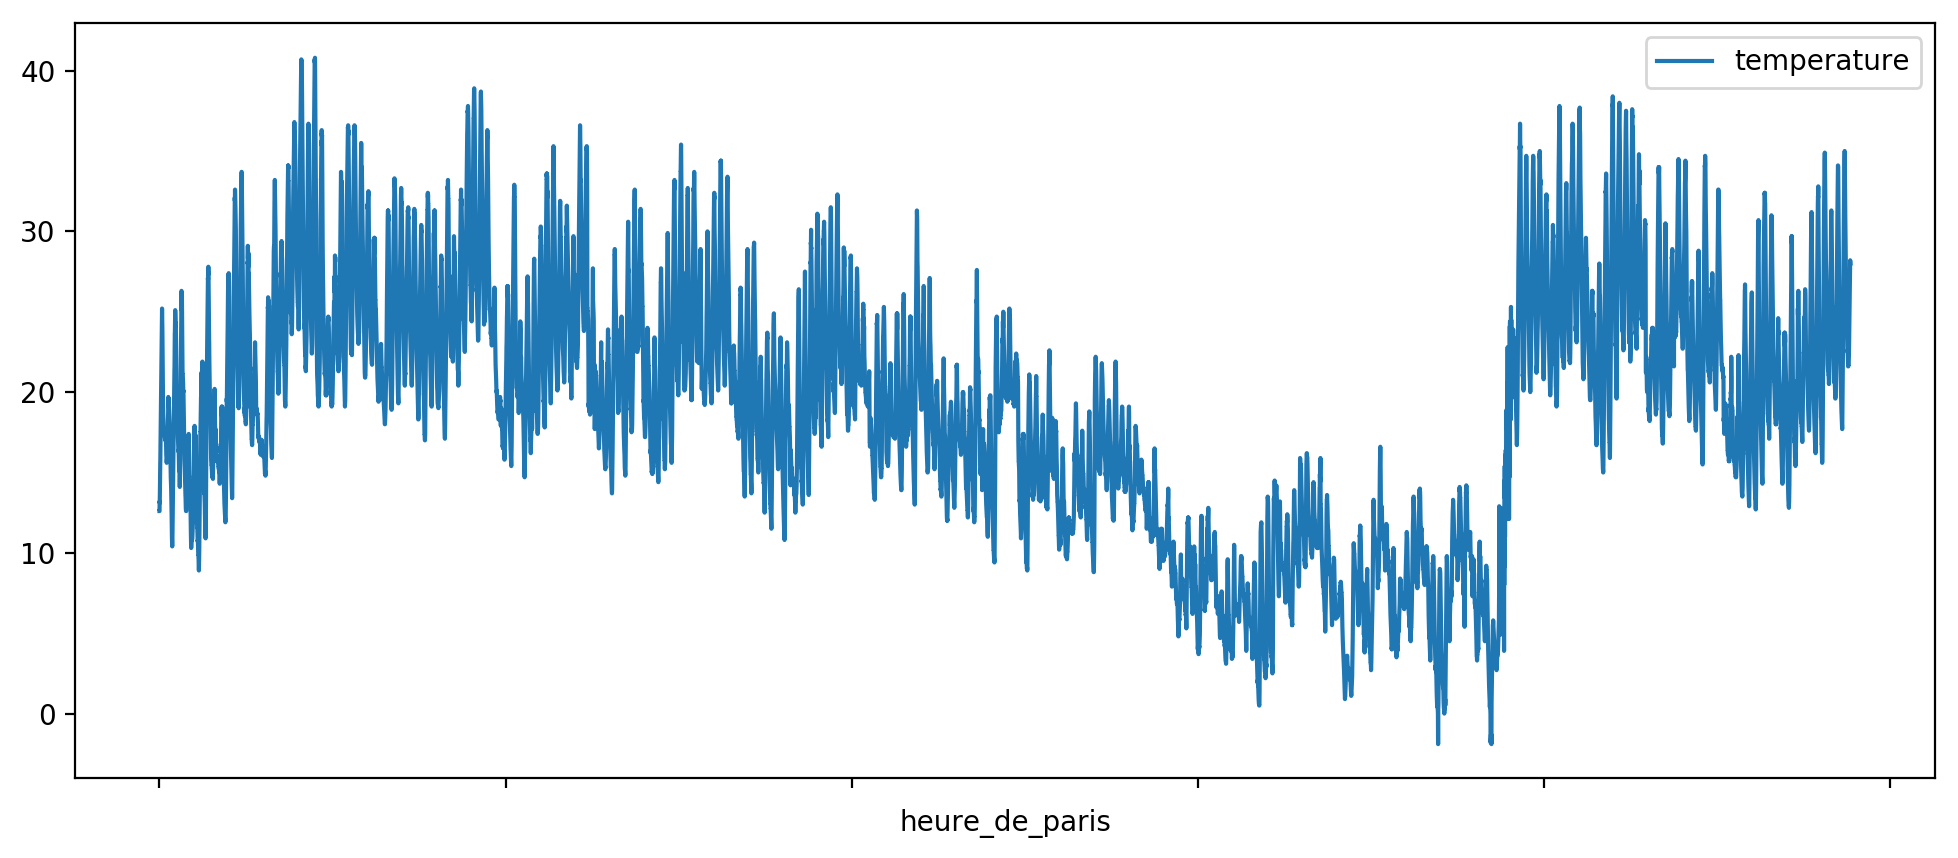

In [14]:
plt.rcParams['figure.figsize'] = [12, 5] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce
temp.plot()

On peut voir que la témperature diminue progressivement depuis moitié septembre vers 2019-08-15-T00:00:00+02:00 jusqu'aux alentours du 23 juillet où un pic de chaleur fait fortement grimpé la température.

In [15]:
import re

In [16]:
pluie = meteo_clean.pivot_table(values = (["pluie","pluie_intensite_max"]),index='heure_de_paris',aggfunc='mean')
pluie

,pluie,pluie_intensite_max
heure_de_paris,,
2019-06-06T08:45:00+02:00,0.0,0.0
2019-06-06T09:00:00+02:00,0.0,0.0
2019-06-06T09:15:00+02:00,0.0,0.0
2019-06-06T09:30:00+02:00,0.0,0.0
2019-06-06T09:45:00+02:00,0.0,0.0
2019-06-06T10:00:00+02:00,0.0,0.0
2019-06-06T10:15:00+02:00,0.0,0.0
2019-06-06T10:30:00+02:00,0.0,0.0
2019-06-06T10:45:00+02:00,0.0,0.0


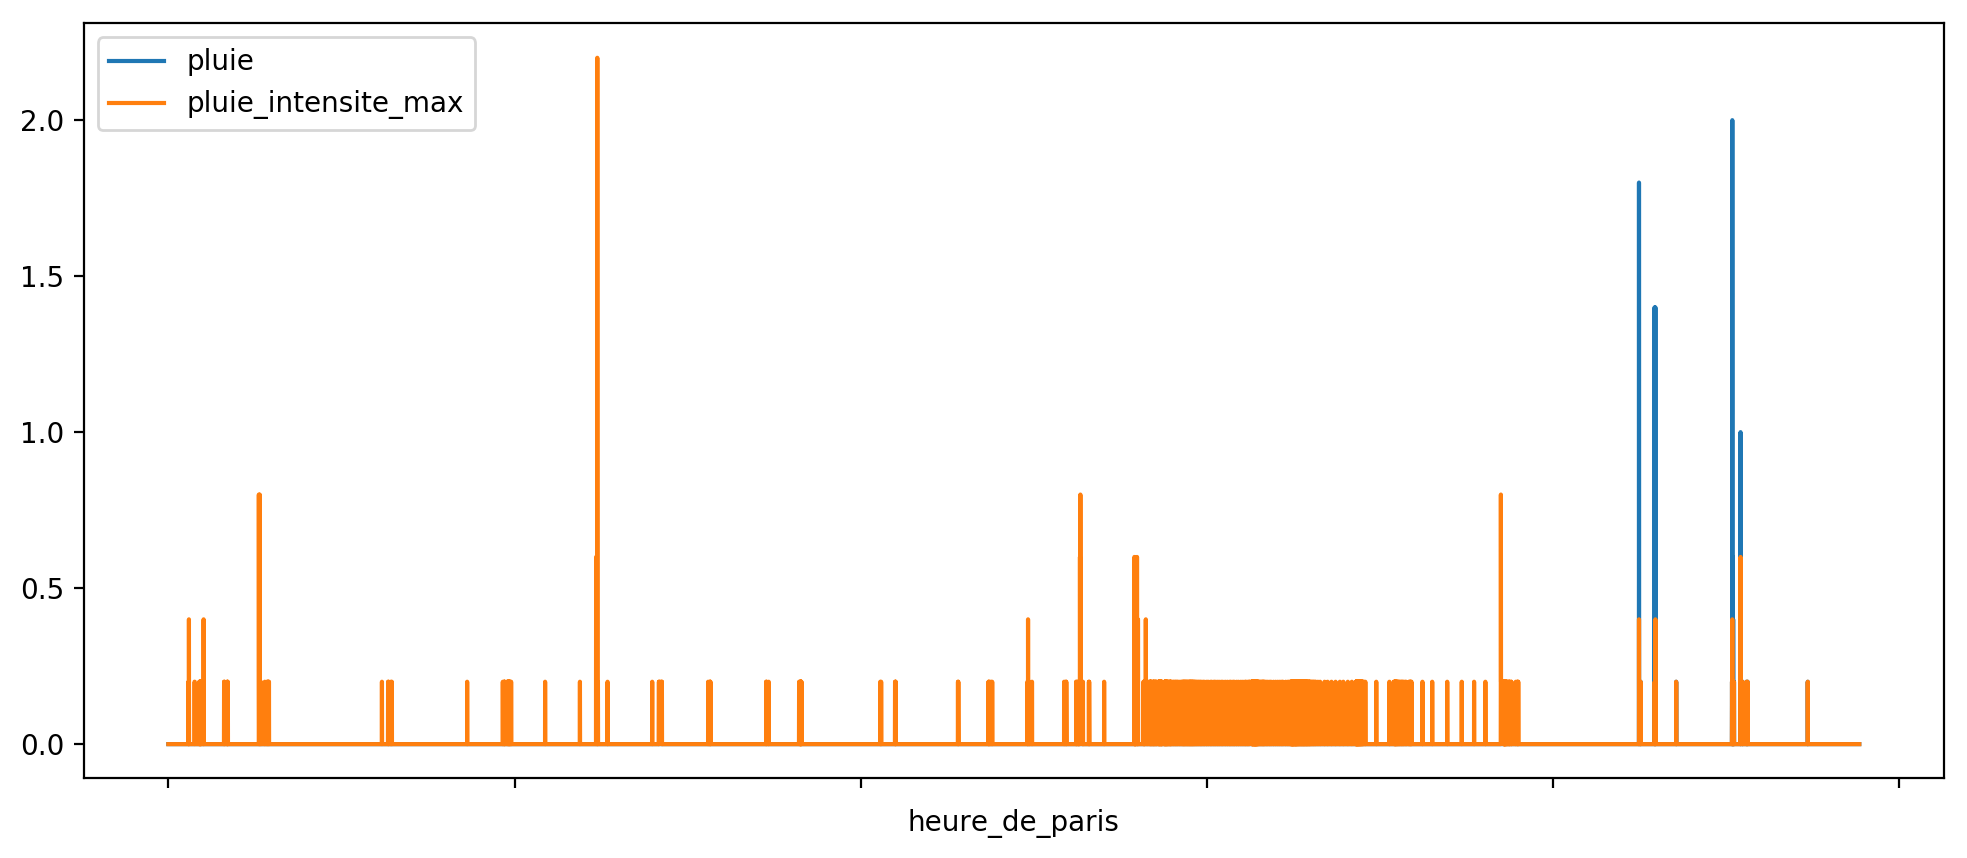

In [17]:
pluie.plot()

Evolution de la pression au cours du temps

In [30]:
press = meteo_clean.pivot_table('pression',meteo_clean.heure_de_paris)
press

,pression
heure_de_paris,
2019-06-06T08:45:00+02:00,90000.0
2019-06-06T09:00:00+02:00,90000.0
2019-06-06T09:15:00+02:00,90000.0
2019-06-06T09:30:00+02:00,90000.0
2019-06-06T09:45:00+02:00,90000.0
2019-06-06T10:00:00+02:00,90000.0
2019-06-06T10:15:00+02:00,90000.0
2019-06-06T10:30:00+02:00,90000.0
2019-06-06T10:45:00+02:00,90000.0


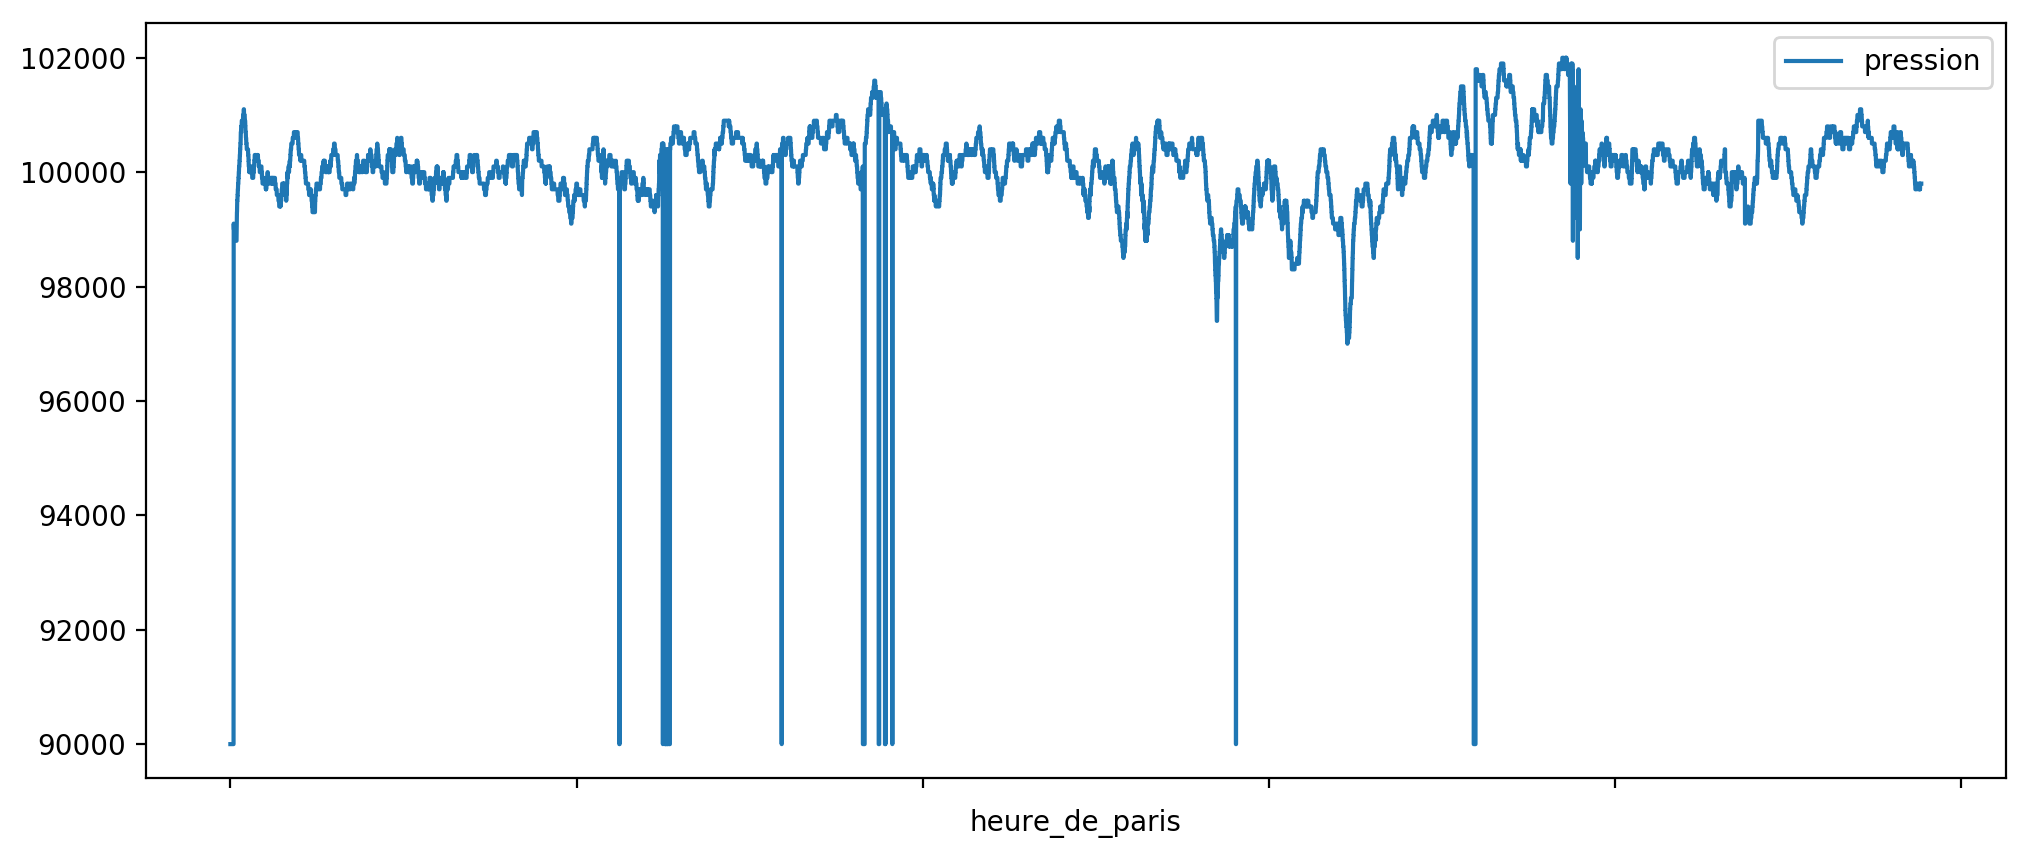

In [31]:
press.plot()

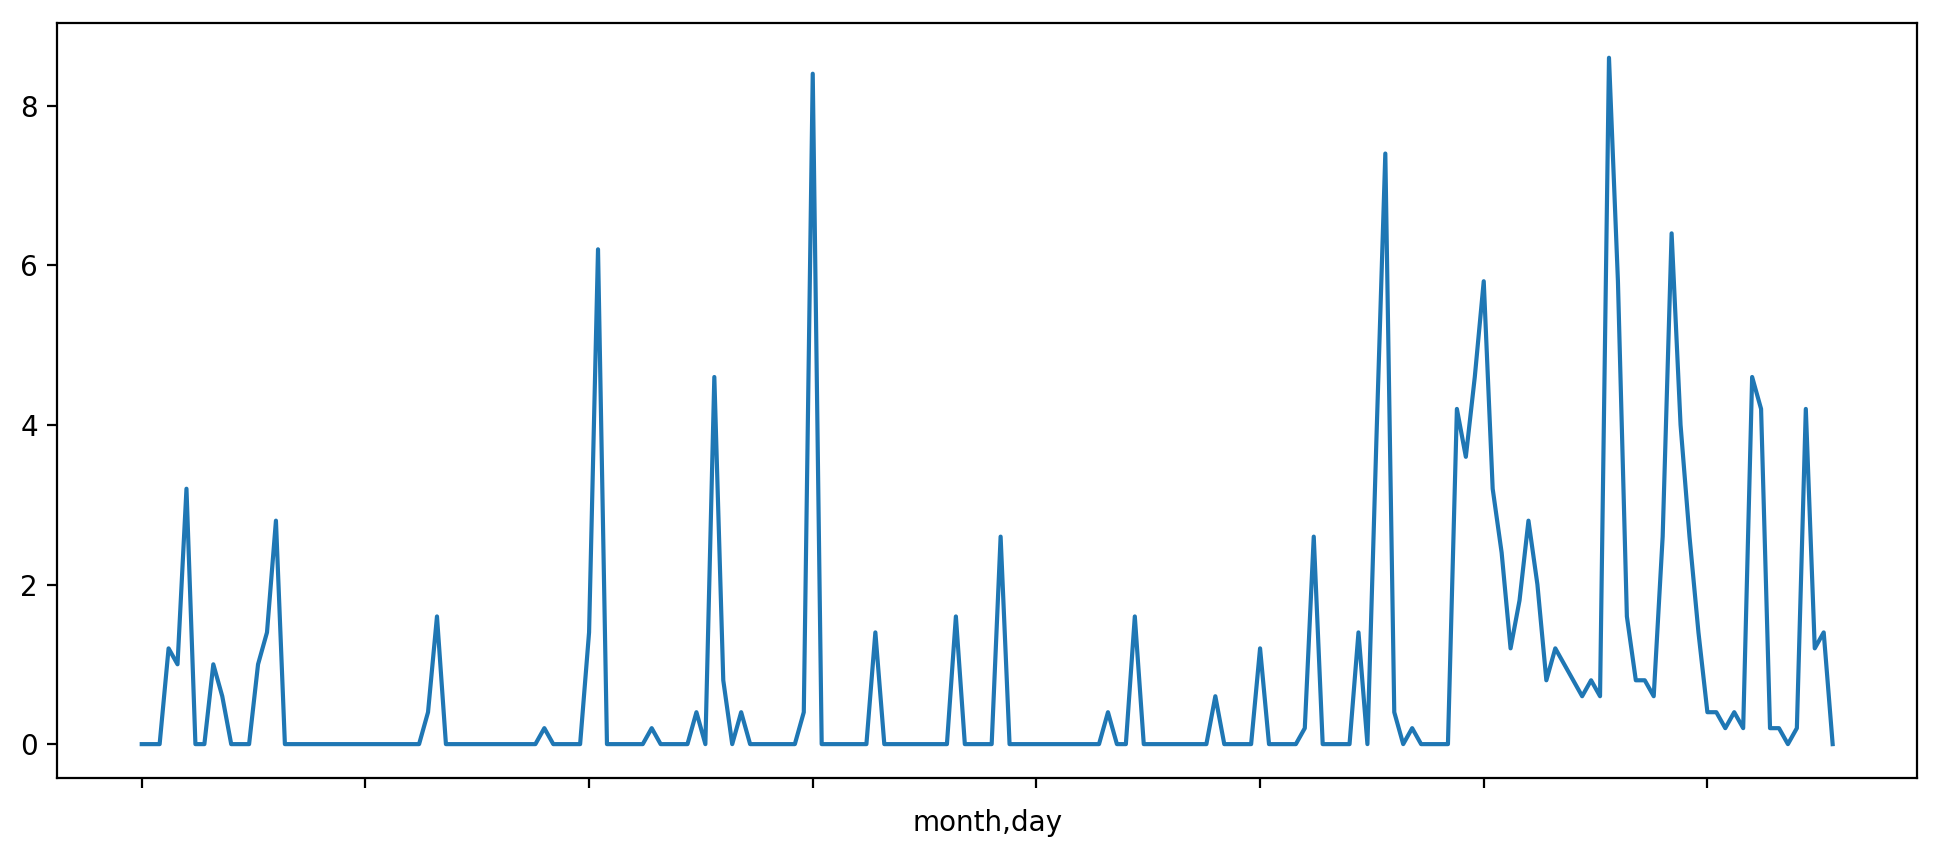

In [35]:
meteo_clean[meteo_clean.year == 2019].groupby(["month","day"]).pluie_intensite_max.sum().plot(ydata=meteo_clean[meteo_clean.year == 2019].groupby(["month","day"]))